In [1]:
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt

In [2]:
dir = "/home/palnika-chavan/Downloads/Dataset/CatsDogs"

In [3]:
categories = ["Cat", "Dog"]
data = []
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgPath = os.path.join(path, img)
        petimg = cv2.imread(imgPath, 0)
        try:
            petImg = cv2.resize(petimg,(100,100))
            image = np.array(petImg).flatten()
            data.append([image, label])
        except Exception as e:
            pass

print(len(data))

1101


In [4]:
import pickle
pick_in = open("data1.pickle", 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [5]:
pick_in = open("data1.pickle", 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [6]:
import random
random.shuffle(data)
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)
feature = np.array(features)
label = np.array(labels)

Accuracy  0.5652173913043478
Prediction :Cat


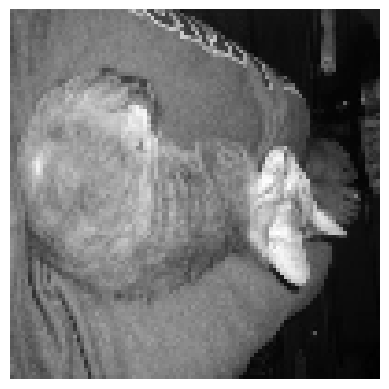

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size = 0.25)
svc = SVC(C = 1, gamma = 'auto', kernel = 'poly')
svc.fit(xtrain, ytrain)
pred = svc.predict(xtest)
accuracy = svc.score(xtest, ytest)
print("Accuracy ",accuracy)
print(f"Prediction :{categories[pred[0]]}")
mypet = xtest[0].reshape(100,100)
plt.imshow(mypet, cmap = 'gray')
plt.axis('off')
plt.show()